In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1. We have the min and max temperatures in a city in India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.

In [2]:
max_temp=[39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
min_temp=[21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

In [50]:
month=np.arange(1,13,1)

In [51]:
df=pd.DataFrame({'month':month, 'max_temp':max_temp, 'min_temp':min_temp})

In [52]:
df

,month,max_temp,min_temp
0,1,39,21
1,2,41,23
2,3,43,27
3,4,47,28
4,5,49,32
5,6,51,35
6,7,45,31
7,8,38,28
8,9,37,21
9,10,29,19


In [17]:
from scipy.optimize import curve_fit

In [55]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg+ ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = curve_fit(yearly_temps, month,
                                      max_temp, [20, 10, 0])
res_min, cov_min = curve_fit(yearly_temps, month,
                                      min_temp, [-40, 20, 0])

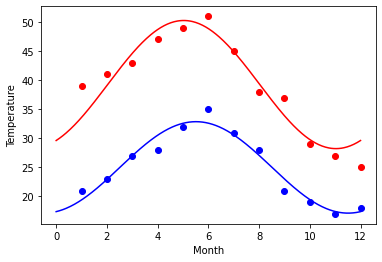

In [56]:
days=np.linspace(0, 12, num=365)

plt.figure()
plt.plot(df['month'], df['max_temp'], 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(df['month'], df['min_temp'], 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

2. Charts to plot:


* Create a pie chart presenting the male/female proportion
* Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [18]:
titanic=pd.read_csv('titanic_original.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Male proportion:  64.35 %
Female proportion:  35.57 %


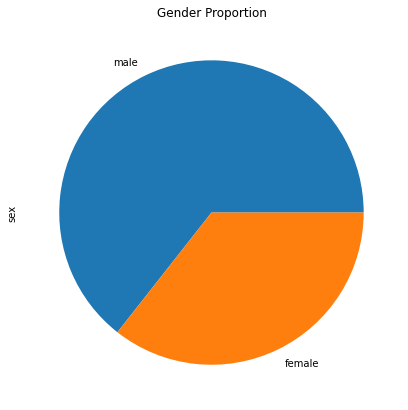

In [38]:
titanic['sex'].value_counts().plot.pie(figsize = (7,7))
plt.title('Gender Proportion')
print('Male proportion: ', round(titanic['sex'].value_counts()[0]/len(titanic['sex'])*100, 2), '%')
print('Female proportion: ', round(titanic['sex'].value_counts()[1]/len(titanic['sex'])*100,2), '%')

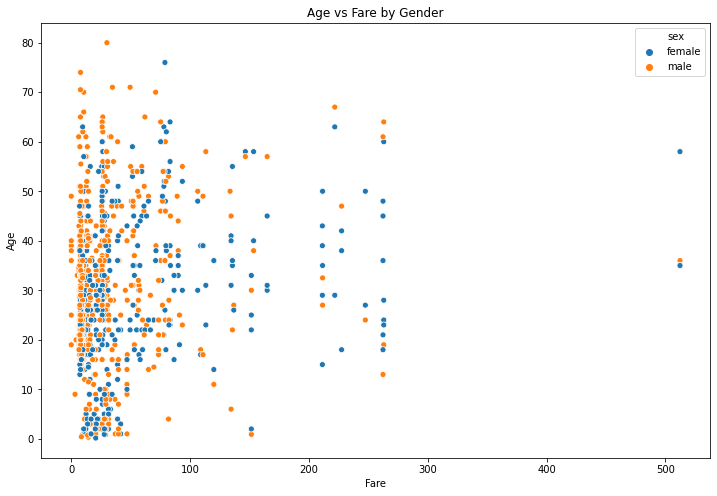

In [39]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='fare', y='age', data=titanic, hue='sex')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Age vs Fare by Gender')
plt.show()